In [772]:
import numpy as np

In [773]:
import pandas as pd

In [774]:
import matplotlib.pyplot as plt 

In [775]:
import seaborn as sns

In [776]:
color= sns.color_palette()

In [777]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [778]:
pwd

'/Users/mengyiwang'

In [779]:
df = pd.read_csv('Copy of utdallas_contest_data-3.csv')

/Users/mengyiwang/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (101,103,111,139,140,141,142,143,157,175,179,188,189,234,263,264,288,290,318,319,321,325,350,352,355,356,357,367,370,371,381,388,389,419,457,463,470,474,476,478,479,480,481,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,505,506,507,508,509,562,563,615,629,641,643,665,669,671,673,677,681,683) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning

In [780]:
df.head(10)

,Unnamed: 0,wgtpop,wgthh,dataright_seq,match,match_level_1,State_99039,Zip_Code_99040,Zip4_Code_99041,Len_of_Residence_90300,...,other22_times_shopped_30_days,other22_shopped_3_mos,other23_times_shopped_30_days,other23_shopped_3_mos,other24_times_shopped_30_days,other24_shopped_3_mos,other25_times_shopped_30_days,other25_shopped_3_mos,other26_times_shopped_30_days,other26_shopped_3_mos
0,0,1973,391,2517,Y,1,CT,6604,2004.0,NaN,...,NaN,0,NaN,0,C,1,NaN,0,NaN,0
1,1,348,345,2518,Y,1,CT,6604,2004.0,1.0,...,NaN,0,NaN,0,C,1,NaN,0,NaN,0
2,2,396,392,2519,Y,1,CT,6604,2003.0,15.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,4,1040,515,2521,Y,1,CT,6604,2004.0,15.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,5,209,207,2522,Y,1,CT,6604,2003.0,15.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
5,6,577,286,2523,Y,1,CT,6604,2003.0,15.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
6,7,656,217,2524,Y,1,CT,6604,2004.0,15.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
7,8,267,264,2525,Y,2,CT,6604,2003.0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
8,9,524,519,3525,Y,1,NJ,7666,1602.0,15.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
9,10,674,223,3526,Y,1,NJ,7666,1601.0,15.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [781]:
df.shape

(35966, 685)

In [782]:
df.State_U324007.nunique()

49

In [783]:
customer_State=df[['State_U324007','dataright_seq']].drop_duplicates()
customer_State.groupby(['State_U324007'])['dataright_seq'].aggregate('count').reset_index().sort_values('dataright_seq', ascending=False)


,State_U324007,dataright_seq
3,CA,3974
41,TX,3158
32,NY,2646
12,IL,2475
8,FL,1782
29,NJ,1760
36,PA,1721
9,GA,1644
17,MA,1251
43,VA,1150


In [784]:
rfm = pd.read_csv('RFM.csv')

In [785]:
rfm.head(10)

,dataright_seq,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,...,other22_times_shopped_30_days,other22_shopped_3_mos,other23_times_shopped_30_days,other23_shopped_3_mos,other24_times_shopped_30_days,other24_shopped_3_mos,other25_times_shopped_30_days,other25_shopped_3_mos,other26_times_shopped_30_days,other26_shopped_3_mos
0,2517.0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,C,1,NaN,0,NaN,0
1,2518.0,1,C,1,B,1,C,B,F,NaN,...,NaN,0,NaN,0,C,1,NaN,0,NaN,0
2,2519.0,1,B,0,NaN,1,B,NaN,A,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
3,2521.0,1,C,0,NaN,1,C,NaN,E,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
4,2522.0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
5,2523.0,1,C,1,C,1,C,NaN,D,B,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
6,2524.0,1,C,0,NaN,1,C,NaN,C,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
7,2525.0,1,B,0,NaN,1,B,NaN,A,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
8,3525.0,1,B,0,NaN,1,B,NaN,C,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
9,3526.0,0,NaN,0,NaN,0,NaN,NaN,NaN,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [786]:
## amt of money spent by customers
## Categories in which customers purchased frequently
## Seasonality trend and frequrncy of purchase done
## Basket analysis of each customer

In [787]:
recency=pd.read_csv('recency.csv')

In [788]:
recency.head(10)

,dataright_seq,wc_bought_any in 12,client_shopped_3_mos,client_times_shopped_30_days
0,2517.0,0,0,NaN
1,2518.0,1,0,NaN
2,2519.0,1,0,NaN
3,2521.0,1,0,NaN
4,2522.0,0,0,NaN
5,2523.0,1,1,B
6,2524.0,1,0,NaN
7,2525.0,1,0,NaN
8,3525.0,1,0,NaN
9,3526.0,0,0,NaN


In [789]:
recency["client_times_shopped_30_days"] = recency["client_times_shopped_30_days"].astype('category')

In [790]:
recency.dtypes

dataright_seq                    float64
wc_bought_any in 12                int64
client_shopped_3_mos               int64
client_times_shopped_30_days    category
dtype: object

In [791]:
# for column client_times_shopped_30_days， replace NAN to 0

In [792]:
recency['client_times_shopped_30_days'] = recency['client_times_shopped_30_days'].replace(np.nan, 0)

In [793]:
recency.head(10)

,dataright_seq,wc_bought_any in 12,client_shopped_3_mos,client_times_shopped_30_days
0,2517.0,0,0,0
1,2518.0,1,0,0
2,2519.0,1,0,0
3,2521.0,1,0,0
4,2522.0,0,0,0
5,2523.0,1,1,B
6,2524.0,1,0,0
7,2525.0,1,0,0
8,3525.0,1,0,0
9,3526.0,0,0,0


In [794]:
type('client_times_shopped_30_days')

str

In [795]:
recency['client_times_shopped_30_days']=recency['client_times_shopped_30_days'].replace(['B','C','D','E','F','G','H'],1) 

In [796]:
recency['client_times_shopped_30_days']=recency['client_times_shopped_30_days'].replace(['A'],0) 

In [797]:
recency.head(20)

,dataright_seq,wc_bought_any in 12,client_shopped_3_mos,client_times_shopped_30_days
0,2517.0,0,0,0
1,2518.0,1,0,0
2,2519.0,1,0,0
3,2521.0,1,0,0
4,2522.0,0,0,0
5,2523.0,1,1,1
6,2524.0,1,0,0
7,2525.0,1,0,0
8,3525.0,1,0,0
9,3526.0,0,0,0


In [798]:
#int('client_times_shopped_30_days')
print (pd.to_numeric(recency.client_times_shopped_30_days, errors='coerce'))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        1.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
        ... 
35936    0.0
35937    0.0
35938    0.0
35939    0.0
35940    1.0
35941    0.0
35942    0.0
35943    0.0
35944    0.0
35945    0.0
35946    0.0
35947    0.0
35948    0.0
35949    0.0
35950    0.0
35951    0.0
35952    0.0
35953    0.0
35954    0.0
35955    0.0
35956    0.0
35957    0.0
35958    0.0
35959    0.0
35960    0.0
35961    0.0
35962    1.0
35963    0.0
35964    0.0
35965    0.0
Name: client_times_shopped_30_days, Length: 35966, dtype: float64


In [799]:
recency.client_times_shopped_30_days=pd.to_numeric(recency.client_times_shopped_30_days, errors='coerce')

In [800]:
recency['Recency_Score'] = recency[['client_times_shopped_30_days','client_shopped_3_mos','wc_bought_any in 12']].sum(axis=1)

In [801]:
recency.head(30)

,dataright_seq,wc_bought_any in 12,client_shopped_3_mos,client_times_shopped_30_days,Recency_Score
0,2517.0,0,0,0.0,0.0
1,2518.0,1,0,0.0,1.0
2,2519.0,1,0,0.0,1.0
3,2521.0,1,0,0.0,1.0
4,2522.0,0,0,0.0,0.0
5,2523.0,1,1,1.0,3.0
6,2524.0,1,0,0.0,1.0
7,2525.0,1,0,0.0,1.0
8,3525.0,1,0,0.0,1.0
9,3526.0,0,0,0.0,0.0


In [802]:
recency.dtypes

dataright_seq                   float64
wc_bought_any in 12               int64
client_shopped_3_mos              int64
client_times_shopped_30_days    float64
Recency_Score                   float64
dtype: object

In [803]:
recency['Recency_Score'] = recency.Recency_Score.astype(int)

In [804]:
recency.sort_values(['Recency_Score'],ascending = False).head(300)

,dataright_seq,wc_bought_any in 12,client_shopped_3_mos,client_times_shopped_30_days,Recency_Score
2997,1699.0,1,1,1.0,3
32987,31607.0,1,1,1.0,3
6450,2488.0,1,1,1.0,3
29923,1411.0,1,1,1.0,3
12138,1333.0,1,1,1.0,3
13032,17273.0,1,1,1.0,3
29832,45557.0,1,1,1.0,3
13030,17662.0,1,1,1.0,3
10618,42237.0,1,1,1.0,3
12137,1332.0,1,1,1.0,3


In [805]:
recency1 = recency.filter(['dataright_seq','Recency_Score'], axis=1)

In [806]:
recency1.head()

,dataright_seq,Recency_Score
0,2517.0,0
1,2518.0,1
2,2519.0,1
3,2521.0,1
4,2522.0,0


In [807]:
frequency = df.filter(['dataright_seq','client_times_shopped_30_days'], axis=1)

In [808]:
frequency.head()

,dataright_seq,client_times_shopped_30_days
0,2517,NaN
1,2518,NaN
2,2519,NaN
3,2521,NaN
4,2522,NaN


In [809]:
frequency.sort_values(['client_times_shopped_30_days'],ascending = False).head(100)

,dataright_seq,client_times_shopped_30_days
17209,38566,I
17208,38564,I
14512,38020,I
13069,16646,H
18543,2924,H
13032,17273,H
24094,41127,G
26302,47842,G
671,5200,G
570,5892,G


In [810]:
frequency['client_times_shopped_30_days'] = frequency['client_times_shopped_30_days'].replace(np.nan, 'A')

In [811]:
#frequency.client_times_shopped_30_days.apply({'A':'0','B':'1','C':'2','D':'3','E':'4','F':'5','G':'6','H':'7'}.get)

In [812]:
frequency.client_times_shopped_30_days=frequency.client_times_shopped_30_days.map(lambda x: 0 if x == 'A' else (1 if x=='B' else (2 if x=='C' else (3 if x=='D' else (4 if x=='E' else (5 if x=='F' else (6 if x=='G' else (7 if x=='H'else 8))))))))

In [813]:
frequency.head(100)

,dataright_seq,client_times_shopped_30_days
0,2517,0
1,2518,0
2,2519,0
3,2521,0
4,2522,0
5,2523,1
6,2524,0
7,2525,0
8,3525,0
9,3526,0


In [814]:
#Monetary

In [815]:
Monetary = df.filter(['dataright_seq','wc_big_ticket_amt_spent','wc_low_ticket_amt_spent'], axis=1)

In [816]:
Monetary.head()

,dataright_seq,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent
0,2517,NaN,NaN
1,2518,B,F
2,2519,NaN,A
3,2521,NaN,E
4,2522,NaN,NaN


In [817]:
Monetary = Monetary.dropna(subset=['wc_big_ticket_amt_spent','wc_low_ticket_amt_spent'])

In [818]:
Monetary.head()

,dataright_seq,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent
1,2518,B,F
13,3532,B,E
14,3533,A,E
16,3173,A,A
19,5046,E,G


In [819]:
Monetary.wc_big_ticket_amt_spent=Monetary.wc_big_ticket_amt_spent.map(lambda x: 1 if x == 'A' else (2 if x=='B' else (3 if x=='C' else (4 if x=='D' else (5 if x=='E' else 0)))
                                                                                                   ))                                                                                            

In [820]:
Monetary.wc_low_ticket_amt_spent=Monetary.wc_low_ticket_amt_spent.map(lambda x: 1 if x == 'A' else (2 if x=='B' else (3 if x=='C' else (4 if x=='D' else (5 if x=='E' else (6 if x=='F' else (7 if x=='G' else 0)))))))

In [821]:
Monetary.head(400)

,dataright_seq,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent
1,2518,2,6
13,3532,2,5
14,3533,1,5
16,3173,1,1
19,5046,5,7
22,5050,2,3
37,4814,1,7
55,5808,3,5
61,6536,4,3
82,7793,1,3


In [822]:
recency1.head()

,dataright_seq,Recency_Score
0,2517.0,0
1,2518.0,1
2,2519.0,1
3,2521.0,1
4,2522.0,0


In [823]:
frequency.head()

,dataright_seq,client_times_shopped_30_days
0,2517,0
1,2518,0
2,2519,0
3,2521,0
4,2522,0


In [824]:
Monetary.head()

,dataright_seq,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent
1,2518,2,6
13,3532,2,5
14,3533,1,5
16,3173,1,1
19,5046,5,7


In [825]:
from functools import reduce
RFM_table = [recency1,frequency,Monetary]
Final_RFM_table = reduce(lambda left,right: pd.merge(left,right,on='dataright_seq'), RFM_table)

In [826]:
Final_RFM_table.head()

,dataright_seq,Recency_Score,client_times_shopped_30_days,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent
0,2518,1,0,2,6
1,3532,1,0,2,5
2,3533,1,0,1,5
3,3173,1,0,1,1
4,5046,1,0,5,7


In [827]:
Final_RFM_table['RFMScore_big'] = Final_RFM_table.Recency_Score.map(str) + Final_RFM_table.client_times_shopped_30_days.map(str)+ Final_RFM_table.wc_big_ticket_amt_spent.map(str)

In [828]:
Final_RFM_table.head()

,dataright_seq,Recency_Score,client_times_shopped_30_days,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,RFMScore_big
0,2518,1,0,2,6,102
1,3532,1,0,2,5,102
2,3533,1,0,1,5,101
3,3173,1,0,1,1,101
4,5046,1,0,5,7,105


In [829]:
Final_RFM_table['RFMScore_low']=Final_RFM_table.Recency_Score.map(str) + Final_RFM_table.client_times_shopped_30_days.map(str)+ Final_RFM_table.wc_low_ticket_amt_spent.map(str)

In [830]:
Final_RFM_table.head()

,dataright_seq,Recency_Score,client_times_shopped_30_days,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,RFMScore_big,RFMScore_low
0,2518,1,0,2,6,102,106
1,3532,1,0,2,5,102,105
2,3533,1,0,1,5,101,105
3,3173,1,0,1,1,101,101
4,5046,1,0,5,7,105,107


In [831]:
RFM_big= Final_RFM_table.filter(['dataright_seq','Recency_Score','client_times_shopped_30_days',
                                 'wc_big_ticket_amt_spent','RFMScore_big'],axis=1)

In [832]:
RFM_big.columns = ['dataright_seq','R','F','M','RFM_big']

In [833]:
RFM_big.head()

,dataright_seq,R,F,M,RFM_big
0,2518,1,0,2,102
1,3532,1,0,2,102
2,3533,1,0,1,101
3,3173,1,0,1,101
4,5046,1,0,5,105


In [834]:
RFM_low= Final_RFM_table.filter(['dataright_seq','Recency_Score','client_times_shopped_30_days',
                                 'wc_low_ticket_amt_spent','RFMScore_low'],axis=1)

In [835]:
RFM_low.columns = ['dataright_seq','R','F','M','RFM_low']

In [836]:
RFM_low.head()

,dataright_seq,R,F,M,RFM_low
0,2518,1,0,6,106
1,3532,1,0,5,105
2,3533,1,0,5,105
3,3173,1,0,1,101
4,5046,1,0,7,107


# K-Mean Model 

# LOW TICKET

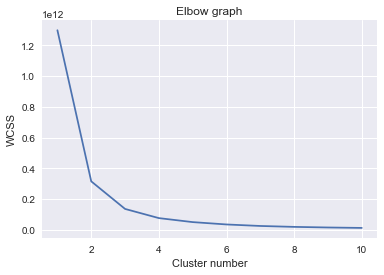

In [837]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(RFM_low)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [838]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(RFM_low)

In [839]:
RFM_low['clusters'] = clusters
RFM_low.head(10)

,dataright_seq,R,F,M,RFM_low,clusters
0,2518,1,0,6,106,0
1,3532,1,0,5,105,0
2,3533,1,0,5,105,0
3,3173,1,0,1,101,0
4,5046,1,0,7,107,0
5,5050,1,0,3,103,0
6,47550,0,0,3,003,3
7,47553,0,0,2,002,3
8,47568,0,0,4,004,3
9,47655,1,0,4,104,3


In [840]:
RFM_low[RFM_low['clusters']==0][['R', 'F', 'M']].mean()

R    1.146094
F    0.115086
M    4.366130
dtype: float64

In [841]:
RFM_low[RFM_low['clusters']==1][['R', 'F', 'M']].mean()

R    1.074729
F    0.035938
M    4.110667
dtype: float64

In [842]:
RFM_low[RFM_low['clusters']==2][['R', 'F', 'M']].mean()

R    1.089385
F    0.071229
M    4.211592
dtype: float64

In [843]:
RFM_low[RFM_low['clusters']==3][['R', 'F', 'M']].mean()

R    1.058350
F    0.059021
M    4.285714
dtype: float64

In [844]:
RFM_low.to_csv('RFM_low.csv')

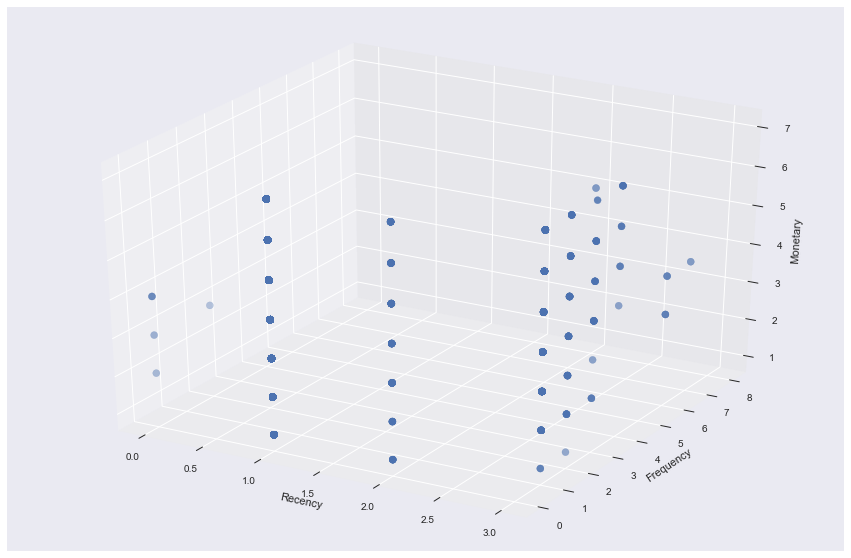

In [845]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM_low.R, RFM_low.F, RFM_low.M, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

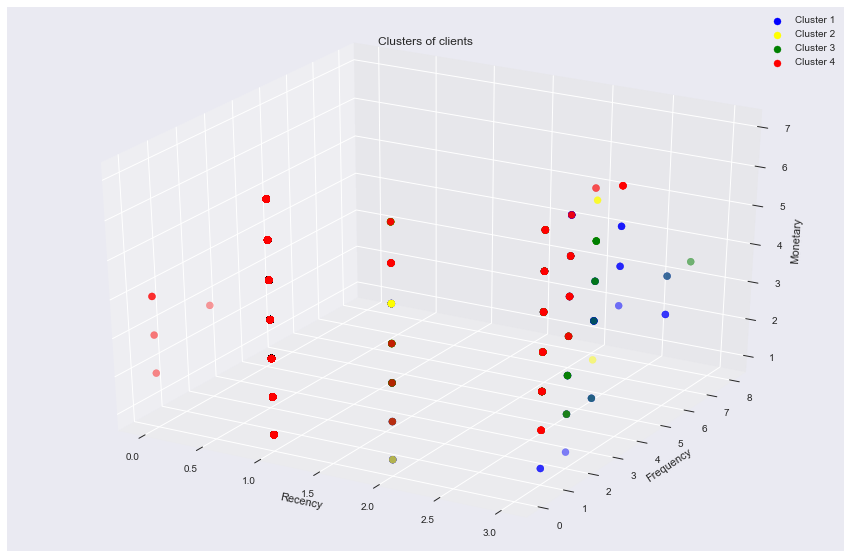

In [846]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(RFM_low[RFM_low.clusters == i].R, 
               RFM_low[RFM_low.clusters == i].F, 
               RFM_low[RFM_low.clusters == i].M, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

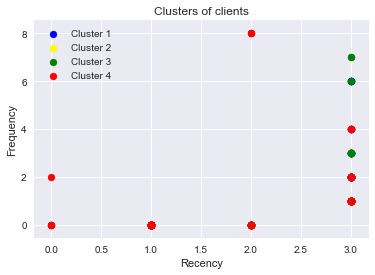

In [847]:
c1 = RFM_low[RFM_low.clusters == 0]
c2 = RFM_low[RFM_low.clusters == 1]
c3 = RFM_low[RFM_low.clusters == 2]
c4 = RFM_low[RFM_low.clusters == 3]

plt.scatter(c1.R, c1.F, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.R, c2.F, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.R, c3.F, c = 'green', label = 'Cluster 3')
plt.scatter(c4.R, c4.F, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

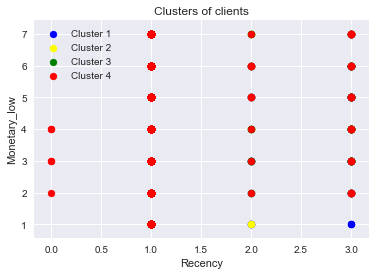

In [848]:
c1 = RFM_low[RFM_low.clusters == 0]
c2 = RFM_low[RFM_low.clusters == 1]
c3 = RFM_low[RFM_low.clusters == 2]
c4 = RFM_low[RFM_low.clusters == 3]

plt.scatter(c1.R, c1.M, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.R, c2.M, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.R, c3.M, c = 'green', label = 'Cluster 3')
plt.scatter(c4.R, c4.M, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Monetary_low')
plt.legend()

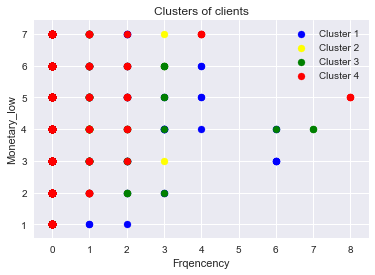

In [849]:
c1 = RFM_low[RFM_low.clusters == 0]
c2 = RFM_low[RFM_low.clusters == 1]
c3 = RFM_low[RFM_low.clusters == 2]
c4 = RFM_low[RFM_low.clusters == 3]

plt.scatter(c1.F, c1.M, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.F, c2.M, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.F, c3.M, c = 'green', label = 'Cluster 3')
plt.scatter(c4.F, c4.M, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Frqencency')
plt.ylabel('Monetary_low')
plt.legend()

# Big ticket

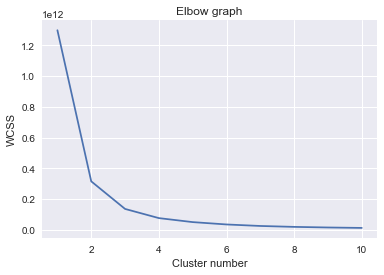

In [850]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(RFM_big)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [851]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
clusters = kmeans.fit_predict(RFM_big)

In [852]:
RFM_big['clusters'] = clusters
RFM_big.head(10)

,dataright_seq,R,F,M,RFM_big,clusters
0,2518,1,0,2,102,0
1,3532,1,0,2,102,0
2,3533,1,0,1,101,0
3,3173,1,0,1,101,0
4,5046,1,0,5,105,0
5,5050,1,0,2,102,0
6,47550,0,0,1,001,3
7,47553,0,0,1,001,3
8,47568,0,0,2,002,3
9,47655,1,0,1,101,3


In [853]:
RFM_big.to_csv('RFM_big.csv')

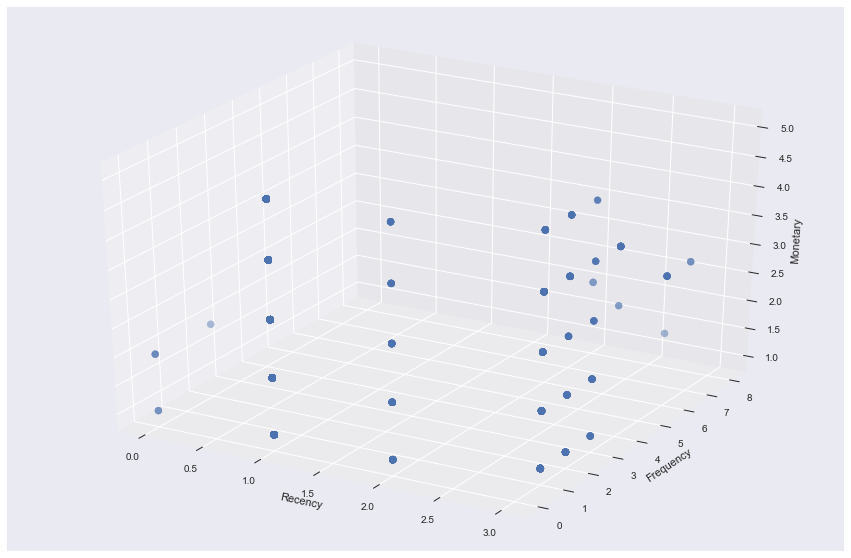

In [854]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM_big.R, RFM_big.F, RFM_big.M, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

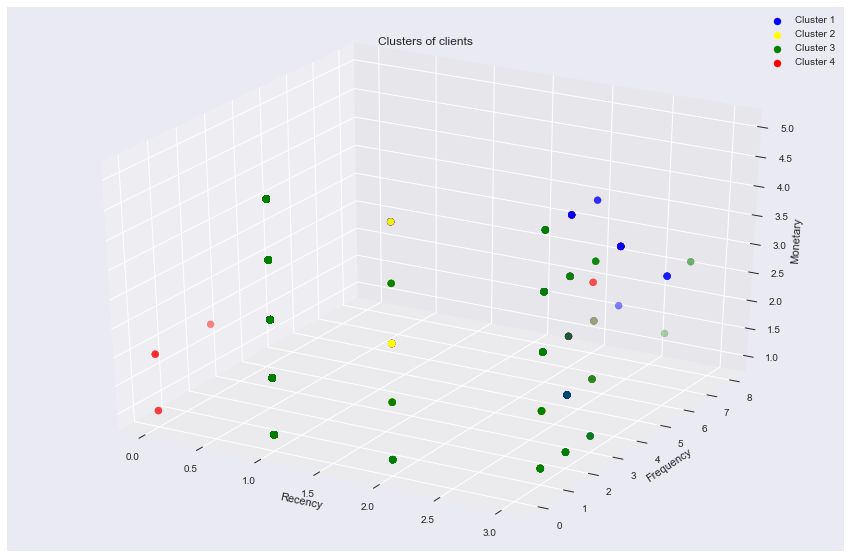

In [855]:
fig = plt.figure(figsize=(15,10))
dx = fig.add_subplot(111, projection='3d')
colors = ['blue', 'yellow', 'green', 'red']

for i in range(0,4):
    dx.scatter(RFM_big[RFM_big.clusters == i].R, 
               RFM_big[RFM_big.clusters == i].F, 
               RFM_big[RFM_big.clusters == i].M, 
               c = colors[i], 
               label = 'Cluster ' + str(i+1), 
               s=50)

dx.set_title('Clusters of clients')
dx.set_xlabel('Recency')
dx.set_ylabel('Frequency')
dx.set_zlabel('Monetary')
dx.legend()

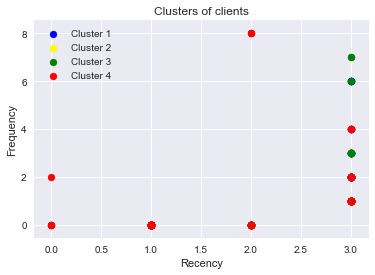

In [856]:
c1 = RFM_big[RFM_big.clusters == 0]
c2 = RFM_big[RFM_big.clusters == 1]
c3 = RFM_big[RFM_big.clusters == 2]
c4 = RFM_big[RFM_big.clusters == 3]

plt.scatter(c1.R, c1.F, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.R, c2.F, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.R, c3.F, c = 'green', label = 'Cluster 3')
plt.scatter(c4.R, c4.F, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend()

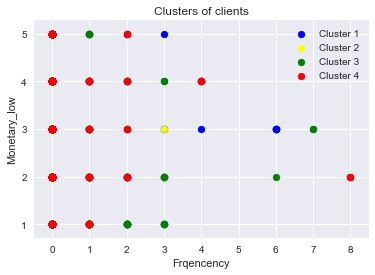

In [857]:
c1 = RFM_big[RFM_big.clusters == 0]
c2 = RFM_big[RFM_big.clusters == 1]
c3 = RFM_big[RFM_big.clusters == 2]
c4 = RFM_big[RFM_big.clusters == 3]

plt.scatter(c1.F, c1.M, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.F, c2.M, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.F, c3.M, c = 'green', label = 'Cluster 3')
plt.scatter(c4.F, c4.M, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Frqencency')
plt.ylabel('Monetary_low')
plt.legend()

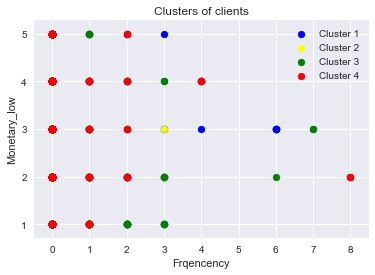

In [858]:
c1 = RFM_big[RFM_big.clusters == 0]
c2 = RFM_big[RFM_big.clusters == 1]
c3 = RFM_big[RFM_big.clusters == 2]
c4 = RFM_big[RFM_big.clusters == 3]

plt.scatter(c1.F, c1.M, c = 'blue', label = 'Cluster 1')
plt.scatter(c2.F, c2.M, c = 'yellow', label = 'Cluster 2')
plt.scatter(c3.F, c3.M, c = 'green', label = 'Cluster 3')
plt.scatter(c4.F, c4.M, c = 'red', label = 'Cluster 4')

plt.title('Clusters of clients')
plt.xlabel('Frqencency')
plt.ylabel('Monetary_low')
plt.legend()

In [859]:
RFM_big[RFM_big['clusters']==0][['R', 'F', 'M']].mean()

R    1.146094
F    0.115086
M    2.153250
dtype: float64

In [860]:
RFM_big[RFM_big['clusters']==1][['R', 'F', 'M']].mean()

R    1.074729
F    0.035938
M    1.919566
dtype: float64

In [861]:
RFM_big[RFM_big['clusters']==2][['R', 'F', 'M']].mean()

R    1.089385
F    0.071229
M    2.012570
dtype: float64

In [862]:
RFM_big[RFM_big['clusters']==3][['R', 'F', 'M']].mean()

R    1.058350
F    0.059021
M    1.943662
dtype: float64

# Merge

In [863]:
RFM_big_C1=RFM_big[RFM_big['clusters']==1].set_index('dataright_seq')

In [864]:
df1=df.set_index('dataright_seq')

In [865]:
result=pd.concat([df1,RFM_big_C1],axis=1,join='inner')

In [869]:
result.head()

,Unnamed: 0,wgtpop,wgthh,match,match_level_1,State_99039,Zip_Code_99040,Zip4_Code_99041,Len_of_Residence_90300,Marital_Status_90301,...,other24_shopped_3_mos,other25_times_shopped_30_days,other25_shopped_3_mos,other26_times_shopped_30_days,other26_shopped_3_mos,R,F,M,RFM_big,clusters
dataright_seq,,,,,,,,,,,,,,,,,,,,,
30159.0,1972,171,169,Y,2,IL,60608,6515.0,NaN,NaN,...,0,NaN,0,NaN,0,1,0,2,102,1
30289.0,1999,113,112,Y,2,IL,60618,2219.0,15.0,NaN,...,0,NaN,0,NaN,0,1,0,1,101,1
30855.0,2005,872,172,Y,1,IL,60714,2122.0,15.0,M,...,0,NaN,0,NaN,0,1,0,4,104,1
30857.0,2007,173,86,Y,1,IL,60714,2121.0,15.0,M,...,1,NaN,0,NaN,0,1,0,3,103,1
30269.0,2013,255,253,Y,2,IL,60617,6616.0,15.0,NaN,...,0,NaN,0,NaN,0,1,0,1,101,1


In [870]:
result.shape

(1753, 689)

In [875]:
### R :0-3 F:0-8 M_big:0-5 M_low:0-7

In [876]:
RFM_big.head()

,dataright_seq,R,F,M,RFM_big,clusters
0,2518,1,0,2,102,0
1,3532,1,0,2,102,0
2,3533,1,0,1,101,0
3,3173,1,0,1,101,0
4,5046,1,0,5,105,0


In [877]:
RFM_low.head()

,dataright_seq,R,F,M,RFM_low,clusters
0,2518,1,0,6,106,0
1,3532,1,0,5,105,0
2,3533,1,0,5,105,0
3,3173,1,0,1,101,0
4,5046,1,0,7,107,0


# RFM_big Cluster

In [907]:
RFM_big1=RFM_big[RFM_big['R']!=0 &(RFM_big['M']!=0)]  # delete R=0 and M=0
RFM_big1.head()

,dataright_seq,R,F,M,RFM_big,clusters
0,2518,1,0,2,102,0
1,3532,1,0,2,102,0
2,3533,1,0,1,101,0
3,3173,1,0,1,101,0
4,5046,1,0,5,105,0


In [1092]:
# 3 (2-8) 5  ====> Champions
RFM_big1[(RFM_big1['R']==3 )& (RFM_big1['F']>=2)&(RFM_big1['F']<= 8 )& (RFM_big1['M']==5)]

,dataright_seq,R,F,M,RFM_big,clusters
43,5833,3,2,5,325,0
2182,1939,3,3,5,335,0
4053,8440,3,2,5,325,0
4745,39474,3,2,5,325,3
5387,37566,3,2,5,325,3


In [1150]:
Champion_big=RFM_big1[(RFM_big1['R']==3 )& (RFM_big1['F']>=2)&(RFM_big1['F']<= 8 )& (RFM_big1['M']==5)]
Champion_big1=Champion_big.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
Champion_big_demographic=pd.concat([Champion_big1,df1],axis=1,join='inner')
Champion_big_demographic=Champion_big_demographic[['Generations_2_U324527','State_U324007','Gender_Code_90304','Age_U324094','Age_Range_90305','Race_Code_90308','Occ_1st_Indv_90317','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
Champion_big_demographic
#Champion_demographic=Champion_demographic[['Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
#Champion_demographic=Champion_demographic.filter(['Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543'],axis=1）
#NY
#AGE E
#T5,L1,L4

,Generations_2_U324527,State_U324007,Gender_Code_90304,Age_U324094,Age_Range_90305,Race_Code_90308,Occ_1st_Indv_90317,Marital_Status_90301,Chan_Pref_FirstPref_U324542,Chan_Pref_Scnd_Pref_U324543
dataright_seq,,,,,,,,,,
5833,T5,NY,F,56.0,E,H,NaN,NaN,T,P
1939,NaN,NH,NaN,NaN,D,A,NaN,NaN,W,T
8440,NaN,NY,F,NaN,A,B,NaN,NaN,C,T
39474,L1,WY,F,63.0,E,W,NaN,NaN,E,M
37566,L4,TX,F,66.0,F,W,B,M,M,P


In [961]:
# M=5(best)=====>big spenders 
RFM_big1[RFM_big1['M']==5]

,dataright_seq,R,F,M,RFM_big,clusters
4,5046,1,0,5,105,0
18,6330,1,0,5,105,0
43,5833,3,2,5,325,0
59,6453,1,0,5,105,0
74,2406,1,0,5,105,0
75,3308,1,0,5,105,0
76,3309,1,0,5,105,0
87,4992,1,0,5,105,0
107,4838,1,0,5,105,0
108,3838,1,0,5,105,0


In [1152]:
BigSpender_big=RFM_big1[RFM_big1['M']==5]
BigSpender_big1=BigSpender_big.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
BigSpender_big_demographic=pd.concat([BigSpender_big1,df1],axis=1,join='inner')
BigSpender_big_demographic=BigSpender_big_demographic[['Generations_2_U324527','State_U324007','Gender_Code_90304','Age_Range_90305','Race_Code_90308','Occ_1st_Indv_90317','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
BigSpender_big_demographic.Chan_Pref_FirstPref_U324542.value_counts()
BigSpender_big_demographic.Generations_2_U324527.value_counts()
# Age D E
# NY TX CA
## T5,G5,M2,M5

T5    35
G5    34
M2    23
M5    23
L2    22
G8    13
S8    13
L6    12
M6    12
L5    10
G2    10
S4     9
M1     7
M7     7
T7     7
T3     6
L4     6
T1     6
G4     5
L3     5
S1     5
L1     5
T6     4
G6     4
T2     4
G3     3
S5     3
M3     3
S7     2
S3     2
S6     2
G7     2
T4     1
M4     1
Name: Generations_2_U324527, dtype: int64

In [1057]:
BigSpender_big_demographic.Chan_Pref_Scnd_Pref_U324543.value_counts()

M    65
W    61
P    60
C    57
E    52
T    51
Name: Chan_Pref_Scnd_Pref_U324543, dtype: int64

In [987]:
# R= 1,2 F=4-8(best), M=2(best not null) =====>At Risk  
RFM_big1[(RFM_big1['M']==2) & ((RFM_big1['R']==1 )| (RFM_big1['R']==2))& ((RFM_big1['F']>=4)&(RFM_big1['F']<= 8 ))]

,dataright_seq,R,F,M,RFM_big,clusters
2551,38020,2,8,2,282,3
2990,38564,2,8,2,282,3
2991,38566,2,8,2,282,3


In [1153]:
AtRisk_big=RFM_big1[(RFM_big1['M']==2) & ((RFM_big1['R']==1 )| (RFM_big1['R']==2))& ((RFM_big1['F']>=4)&(RFM_big1['F']<= 8 ))]
AtRisk_big1=AtRisk_big.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
AtRisk_big_demographic=pd.concat([AtRisk_big1,df1],axis=1,join='inner')
AtRisk_big_demographic=AtRisk_big_demographic[['Generations_2_U324527','State_U324007','Age_Range_90305','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
AtRisk_big_demographic
#Age: D
#TX
# T5 T1 G5

,Generations_2_U324527,State_U324007,Age_Range_90305,Marital_Status_90301,Chan_Pref_FirstPref_U324542,Chan_Pref_Scnd_Pref_U324543
dataright_seq,,,,,,
38020,T5,TX,D,NaN,P,T
38564,T1,TX,E,M,M,T
38566,G5,TX,D,NaN,E,T


In [969]:
#R=3, F= 4-8 ====> Loyal customer
RFM_big1[(RFM_big1['R']==3)&(RFM_big1['F']>=4)&(RFM_big1['F']<= 8)]

,dataright_seq,R,F,M,RFM_big,clusters
109,5892,3,6,3,363,0
130,7743,3,6,3,363,0
137,5292,3,4,3,343,0
646,37680,3,4,4,344,3
660,36206,3,4,4,344,3
677,36410,3,4,4,344,3
682,37038,3,4,4,344,3
831,2270,3,6,3,363,0
1190,15907,3,6,2,362,2
1600,3097,3,4,4,344,0


In [1155]:
LoyalCustomer_big=RFM_big1[(RFM_big1['R']==3)&(RFM_big1['F']>=4)&(RFM_big1['F']<= 8)]
LoyalCustomer_big1=LoyalCustomer_big.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
LoyalCustomer_big_demographic=pd.concat([LoyalCustomer_big1,df1],axis=1,join='inner')
LoyalCustomer_big_demographic=LoyalCustomer_big_demographic[['Generations_2_U324527','State_U324007','Age_Range_90305','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
LoyalCustomer_big_demographic.Chan_Pref_FirstPref_U324542.value_counts()
LoyalCustomer_big_demographic.Generations_2_U324527.value_counts()
##age D 
###NY,TX
##G5,M5,S8,G7

G5    2
M5    2
S8    2
G7    2
L3    1
G8    1
M7    1
L5    1
L4    1
T5    1
T2    1
S4    1
Name: Generations_2_U324527, dtype: int64

In [1061]:
LoyalCustomer_big_demographic.Chan_Pref_Scnd_Pref_U324543.value_counts()

C    4
M    4
P    4
W    2
E    2
T    2
Name: Chan_Pref_Scnd_Pref_U324543, dtype: int64

In [993]:
# Lost Customers R=0,F=0-8,M=0-8
RFM_big[(RFM_big['R']==0 )& ((RFM_big['F']>=0)&(RFM_big['F']<=8))& ((RFM_big['M']>=0)&(RFM_big['M']<=5))]

,dataright_seq,R,F,M,RFM_big,clusters
6,47550,0,0,1,001,3
7,47553,0,0,1,001,3
8,47568,0,0,2,002,3
10,47575,0,0,2,002,3
11,47577,0,2,2,022,3


In [1156]:
LostCustomer_big=RFM_big[(RFM_big['R']==0 )& ((RFM_big['F']>=0)&(RFM_big['F']<=8))& ((RFM_big['M']>=0)&(RFM_big['M']<=5))]
LostCustomer_big1=LostCustomer_big.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
LostCustomer_big_demographic=pd.concat([LostCustomer_big1,df1],axis=1,join='inner')
LostCustomer_big_demographic=LostCustomer_big_demographic[['Generations_2_U324527','State_U324007','Race_Code_90308','Age_Range_90305','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
LostCustomer_big_demographic 
##age E
## OR
## L6


,Generations_2_U324527,State_U324007,Race_Code_90308,Age_Range_90305,Marital_Status_90301,Chan_Pref_FirstPref_U324542,Chan_Pref_Scnd_Pref_U324543
dataright_seq,,,,,,,
47550,S4,OR,W,G,M,P,M
47553,L6,OR,W,E,M,M,T
47568,L6,OR,NaN,F,NaN,M,W
47575,T5,OR,W,E,NaN,W,M
47577,M1,OR,W,B,M,E,W


# RFM_low Clusters

In [971]:
RFM_low1=RFM_low[RFM_low['R']!=0 &(RFM_low['M']!=0)]  # delete R=0 and M=0
RFM_low1.head()

,dataright_seq,R,F,M,RFM_low,clusters
0,2518,1,0,6,106,0
1,3532,1,0,5,105,0
2,3533,1,0,5,105,0
3,3173,1,0,1,101,0
4,5046,1,0,7,107,0


In [1086]:
# 3 (4-8) 7  ====> Champions 
RFM_low1[(RFM_low1['R']==3 )& (RFM_low1['F']>=4)&(RFM_low1['F']<= 8 )& (RFM_low1['M']==7)]

,dataright_seq,R,F,M,RFM_low,clusters
646,37680,3,4,7,347,3
660,36206,3,4,7,347,3
677,36410,3,4,7,347,3
682,37038,3,4,7,347,3


In [1142]:
Champion_low=RFM_low1[(RFM_big1['R']==3 )& (RFM_low1['F']>=4)&(RFM_low1['F']<= 8 )& (RFM_low1['M']==7)]
Champion_low1=Champion_low.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
Champion_low_demographic=pd.concat([Champion_low1,df1],axis=1,join='inner')
Champion_low_demographic=Champion_big_demographic[['State_U324007','Age_Range_90305','Gender_Code_90304','Age_Range_90305','Race_Code_90308','Occ_1st_Indv_90317','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
Champion_low_demographic.Chan_Pref_FirstPref_U324542.value_counts()
Champion_low_demographic
#age E 
#NY

,State_U324007,Age_Range_90305,Gender_Code_90304,Age_Range_90305,Race_Code_90308,Occ_1st_Indv_90317,Marital_Status_90301,Chan_Pref_FirstPref_U324542,Chan_Pref_Scnd_Pref_U324543
dataright_seq,,,,,,,,,
5833,NY,E,F,E,H,NaN,NaN,T,P
1939,NH,D,NaN,D,A,NaN,NaN,W,T
8440,NY,A,F,A,B,NaN,NaN,C,T
39474,WY,E,F,E,W,NaN,NaN,E,M
37566,TX,F,F,F,W,B,M,M,P


In [1090]:
Champion_low_demographic.Chan_Pref_Scnd_Pref_U324543.value_counts()

M    6
T    3
P    3
C    1
Name: Chan_Pref_Scnd_Pref_U324543, dtype: int64

In [974]:
# M=7(best)=====>big spenders 
RFM_low1[RFM_low1['M']==7]

,dataright_seq,R,F,M,RFM_low,clusters
4,5046,1,0,7,107,0
17,6329,1,0,7,107,0
20,6900,1,0,7,107,0
28,2540,1,0,7,107,0
36,2981,1,0,7,107,0
53,7053,1,0,7,107,0
60,7630,1,0,7,107,0
74,2406,1,0,7,107,0
75,3308,1,0,7,107,0
76,3309,1,0,7,107,0


In [1145]:
BigSpender_low=RFM_low1[RFM_low1['M']==7]
BigSpender_low1=BigSpender_low.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
BigSpender_low_demographic=pd.concat([BigSpender_low1,df1],axis=1,join='inner')
BigSpender_low_demographic=BigSpender_low_demographic[['State_U324007','Age_Range_90305','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
BigSpender_low_demographic.State_U324007.value_counts()
##age --D,E,C
##NY,CA,TX,IL

NY    68
CA    61
TX    57
IL    50
NJ    38
PA    35
MA    24
FL    21
MD    19
VA    18
WI    12
NC    11
GA    10
CT    10
CO    10
OR     9
MO     8
IN     8
TN     8
AZ     7
OH     6
LA     6
MN     6
MI     6
UT     5
KS     5
MS     5
SD     4
OK     4
SC     4
AL     3
IA     3
WA     3
VT     2
DE     2
KY     2
DC     2
NE     2
NH     2
NM     2
AR     1
ID     1
RI     1
NV     1
MT     1
WY     1
Name: State_U324007, dtype: int64

In [1068]:
BigSpender_low_demographic.Chan_Pref_Scnd_Pref_U324543.value_counts()

W    121
M    113
P    100
E     81
T     78
C     71
Name: Chan_Pref_Scnd_Pref_U324543, dtype: int64

In [989]:
# R= 1,2 F=4-8(best), M=5(best not null) =====>At Risk  
RFM_low1[(RFM_low1['M']==5) & ((RFM_low1['R']==1 )| (RFM_low1['R']==2))& ((RFM_low1['F']>=4)&(RFM_low1['F']<= 8 ))]

,dataright_seq,R,F,M,RFM_low,clusters
2551,38020,2,8,5,285,3
2990,38564,2,8,5,285,3
2991,38566,2,8,5,285,3


In [1146]:
AtRisk_low=RFM_low1[(RFM_low1['M']==5) & ((RFM_low1['R']==1 )| (RFM_low1['R']==2))& ((RFM_low1['F']>=4)&(RFM_low1['F']<= 8 ))]
AtRisk_low1=AtRisk_low.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
AtRisk_low_demographic=pd.concat([AtRisk_low1,df1],axis=1,join='inner')
AtRisk_low_demographic=AtRisk_low_demographic[['State_U324007','Age_Range_90305','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
AtRisk_low_demographic
#age D 
#TX

,State_U324007,Age_Range_90305,Marital_Status_90301,Chan_Pref_FirstPref_U324542,Chan_Pref_Scnd_Pref_U324543
dataright_seq,,,,,
38020,TX,D,NaN,P,T
38564,TX,E,M,M,T
38566,TX,D,NaN,E,T


In [991]:
#R=3, F=4-8 ==> Loyal customer
RFM_low1[(RFM_low1['R']==3)&(RFM_low1['F']>=4)&(RFM_low1['F']<= 8)]

,dataright_seq,R,F,M,RFM_low,clusters
109,5892,3,6,4,364,0
130,7743,3,6,4,364,0
137,5292,3,4,4,344,0
646,37680,3,4,7,347,3
660,36206,3,4,7,347,3
677,36410,3,4,7,347,3
682,37038,3,4,7,347,3
831,2270,3,6,3,363,0
1190,15907,3,6,4,364,2
1600,3097,3,4,6,346,0


In [1148]:
LoyalCustomer_low=RFM_low1[(RFM_low1['R']==3)&(RFM_low1['F']>=4)&(RFM_low1['F']<= 8)]
LoyalCustomer_low1=LoyalCustomer_low.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
LoyalCustomer_low_demographic=pd.concat([LoyalCustomer_low1,df1],axis=1,join='inner')
LoyalCustomer_low_demographic=LoyalCustomer_low_demographic[['State_U324007','Age_Range_90305','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
LoyalCustomer_low_demographic.State_U324007.value_counts()
##age D 
## NY ,TX

NY    5
TX    4
MA    2
GA    2
SC    1
PA    1
CT    1
NH    1
NJ    1
Name: State_U324007, dtype: int64

In [1072]:
LoyalCustomer_low_demographic.Chan_Pref_Scnd_Pref_U324543.value_counts()

C    4
M    4
P    4
W    2
E    2
T    2
Name: Chan_Pref_Scnd_Pref_U324543, dtype: int64

In [992]:
# Lost Customers R=0,F=0-8,M=0-7
RFM_low[(RFM_low['R']==0 )& ((RFM_low['F']>=0)&(RFM_low['F']<=8))& ((RFM_low['M']>=0)&(RFM_low['M']<=7))]

,dataright_seq,R,F,M,RFM_low,clusters
6,47550,0,0,3,003,3
7,47553,0,0,2,002,3
8,47568,0,0,4,004,3
10,47575,0,0,4,004,3
11,47577,0,2,3,023,3


In [1149]:
LostCustomer_low=RFM_low[(RFM_low['R']==0 )& ((RFM_low['F']>=0)&(RFM_low['F']<=8))& ((RFM_low['M']>=0)&(RFM_big['M']<=7))]
LostCustomer_low1=LostCustomer_low.set_index('dataright_seq')
df1=df.set_index('dataright_seq')
LostCustomer_low_demographic=pd.concat([LostCustomer_big1,df1],axis=1,join='inner')
LostCustomer_low_demographic=LostCustomer_low_demographic[['State_U324007','Age_Range_90305','Marital_Status_90301','Chan_Pref_FirstPref_U324542','Chan_Pref_Scnd_Pref_U324543']]
LostCustomer_low_demographic
##age E 

,State_U324007,Age_Range_90305,Marital_Status_90301,Chan_Pref_FirstPref_U324542,Chan_Pref_Scnd_Pref_U324543
dataright_seq,,,,,
47550,OR,G,M,P,M
47553,OR,E,M,M,T
47568,OR,F,NaN,M,W
47575,OR,E,NaN,W,M
47577,OR,B,M,E,W


In [994]:
###State,gender,age,marital,educational

# Demographic---Channel

In [ ]:
MARRIED , FEMALE,  NY,TX, CA / OREGON 